In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import calendar

# Carregar o arquivo Excel
df = pd.read_excel('Petróleo.xlsx')

print(df.head())

        Data  Preço - petróleo bruto - Brent (FOB)
0 2024-04-29                                 88.44
1 2024-04-26                                 89.95
2 2024-04-25                                 88.10
3 2024-04-24                                 89.02
4 2024-04-23                                 88.29


In [21]:
# Verificar a quantidade de dados
print("Quantidade de dados antes do tratamento:")
print(df.shape)

Quantidade de dados antes do tratamento:
(3134, 2)


In [22]:
# Tratar valores ausentes (remover neste exemplo)
df = df.dropna()

In [23]:
# Verificar a quantidade de dados após tratamento de valores ausentes
print("\nQuantidade de dados após tratamento de valores ausentes:")
print(df.shape)



Quantidade de dados após tratamento de valores ausentes:
(3134, 2)


In [24]:
# Verificar inconsistências (por exemplo, datas fora do intervalo esperado)
# Suponha que a data deve estar entre 2000 e 2024
inconsistencias = df[(df['Data'].dt.year < 2000) | (df['Data'].dt.year > 2024)]

In [25]:
# Remover inconsistências (ou tratar de outra forma)
df = df.drop(inconsistencias.index)

In [26]:
# Identificar e tratar outliers (exemplo usando IQR)
Q1 = df['Preço - petróleo bruto - Brent (FOB)'].quantile(0.25)
Q3 = df['Preço - petróleo bruto - Brent (FOB)'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


In [28]:
# Identificar outliers
outliers = df[(df['Preço - petróleo bruto - Brent (FOB)'] < limite_inferior) | (df['Preço - petróleo bruto - Brent (FOB)'] > limite_superior)]


In [29]:
# Remover outliers (ou tratar de outra forma)
df = df[~df.index.isin(outliers.index)]

In [30]:
# Verificar a quantidade de dados após tratamento de outliers
print("\nQuantidade de dados após tratamento de outliers:")
print(df.shape)


Quantidade de dados após tratamento de outliers:
(3133, 2)


In [31]:
# Verificar tipos de dados das colunas
tipos_de_dados = df.dtypes

# Exibir tipos de dados das colunas
print("Tipos de dados das colunas:")
print(tipos_de_dados)

Tipos de dados das colunas:
Data                                    datetime64[ns]
Preço - petróleo bruto - Brent (FOB)           float64
dtype: object


Com os dados tratados e entendendo que temos informações sobre o preço do petróleo bruto Brent (FOB) em dólares americanos ao longo do tempo, podemos extrair diversas análises e visualizações interessantes para compreender melhor o comportamento desse mercado. Algumas visões interessantes incluem:

1 - Tendência ao longo do tempo: Visualizar como o preço do petróleo Brent tem variado ao longo dos anos.

2 - Padrões sazonais: Investigar se existem padrões sazonais nos preços do petróleo ao longo dos meses ou trimestres.

3 - Correlações: Verificar se há correlações entre os preços do petróleo e outros indicadores econômicos, como o preço do dólar, o PIB mundial, entre outros.

4 - Análise de volatilidade: Avaliar a volatilidade dos preços ao longo do tempo e identificar períodos de alta volatilidade.

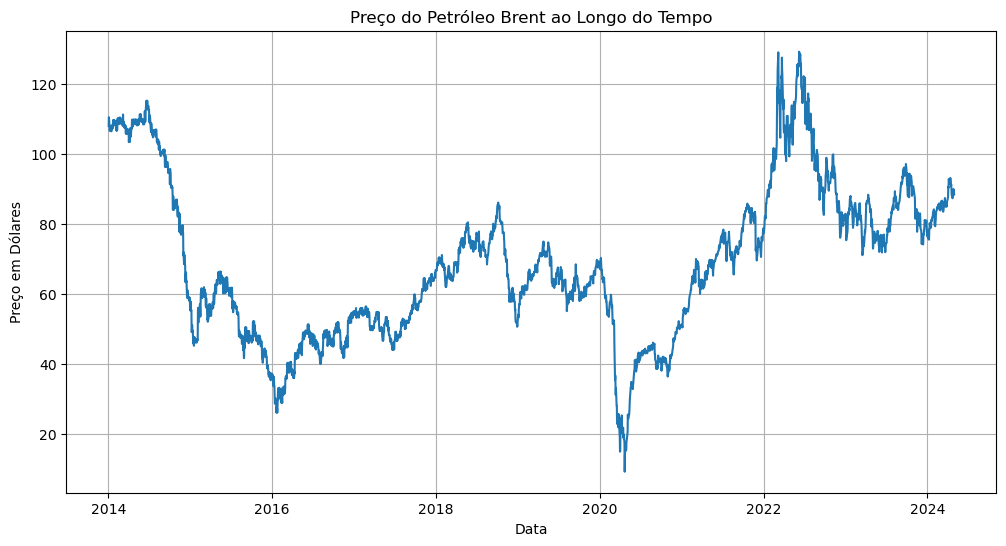

In [32]:
# Visualizar tendência ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Preço - petróleo bruto - Brent (FOB)'])
plt.title('Preço do Petróleo Brent ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço em Dólares')
plt.grid(True)
plt.show()

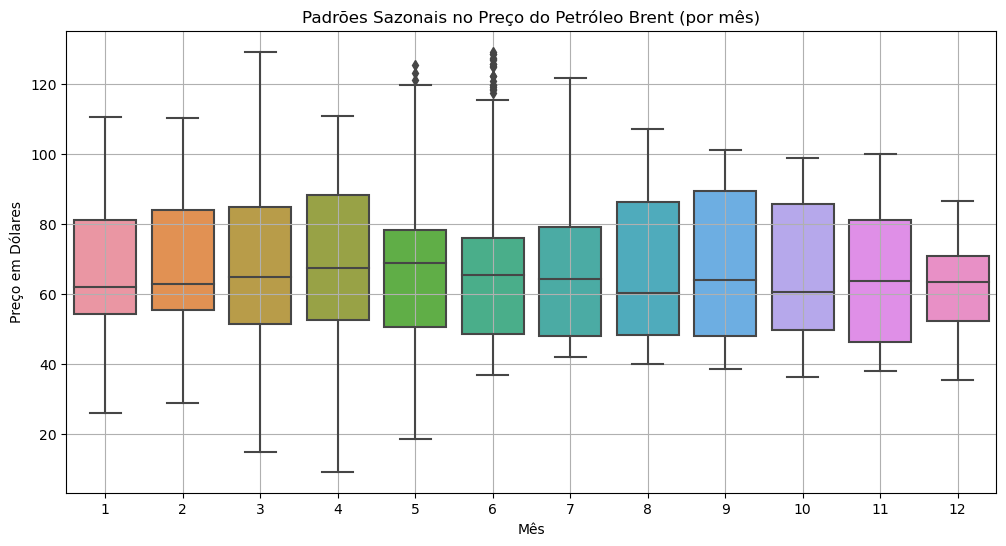

In [34]:
# Verificar padrões sazonais (por exemplo, por mês)
df['Mês'] = df['Data'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mês', y='Preço - petróleo bruto - Brent (FOB)', data=df)
plt.title('Padrões Sazonais no Preço do Petróleo Brent (por mês)')
plt.xlabel('Mês')
plt.ylabel('Preço em Dólares')
plt.grid(True)
plt.show()

In [35]:
#Tratando a nova planilha de correlação com o dolar
df_dolar = pd.read_csv('USD_BRL_Dados_Históricos.csv', delimiter=';')

# Converter a coluna 'Data' para o mesmo formato em ambos os DataFrames
df['Data'] = pd.to_datetime(df['Data'])
df_dolar['Data'] = pd.to_datetime(df_dolar['Data'])

# Renomear coluna 'Último' para 'Valor Real Dólar' para facilitar a compreensão
df_dolar = df_dolar.rename(columns={'Último': 'Valor Real Dólar'})

# Mesclar os DataFrames pelo índice (Data)
df_merged = pd.merge(df, df_dolar, on='Data', how='inner')

# Verificar tipos de dados das colunas
print(df_merged.dtypes)

# Verificar se há valores não numéricos
print(df_merged['Preço - petróleo bruto - Brent (FOB)'].unique())
print(df_merged['Valor Real Dólar'].unique())

Data                                    datetime64[ns]
Preço - petróleo bruto - Brent (FOB)           float64
Mês                                              int64
Valor Real Dólar                                object
Unnamed: 2                                     float64
Unnamed: 3                                     float64
Unnamed: 4                                     float64
Unnamed: 5                                     float64
Unnamed: 6                                     float64
dtype: object
[88.44 89.95 88.1  89.02 88.29 87.3  87.96 88.34 89.54 91.29 90.84 85.82
 79.3  78.31]
['5,1189' '5,1151' '5,1602' '5,1457' '5,126' '5,168' '5,2027' '5,2482'
 '5,242' '5,2826' '5,1846' '5,0725' '5,1113' '5,1936']


In [36]:
# Carregar os arquivos do CSV da planilha dollar
df = pd.read_excel('Petróleo.xlsx')
df_dolar = pd.read_csv('USD_BRL_Dados_Históricos.csv', delimiter=';')

# Converter a coluna 'Data' para o mesmo formato em ambos os DataFrames
df['Data'] = pd.to_datetime(df['Data'])
df_dolar['Data'] = pd.to_datetime(df_dolar['Data'])

# Renomear coluna 'Último' para 'Valor Real Dólar' para facilitar a compreensão
df_dolar = df_dolar.rename(columns={'Último': 'Valor Real Dólar'})

# Substituir vírgulas por pontos e converter para tipo float
df_dolar['Valor Real Dólar'] = df_dolar['Valor Real Dólar'].str.replace(',', '.').astype(float)

# Mesclar os DataFrames pelo índice (Data)
df_merged = pd.merge(df, df_dolar, on='Data', how='inner')

# Calcular a correlação entre o preço do petróleo Brent e o valor real do dólar
correlacao = df_merged['Preço - petróleo bruto - Brent (FOB)'].corr(df_merged['Valor Real Dólar'])

print("Correlação entre preço do petróleo Brent e valor real do dólar:", correlacao)

Correlação entre preço do petróleo Brent e valor real do dólar: 0.28745356886214585


A correlação entre o preço do petróleo Brent e o valor real do dólar é aproximadamente 0.2875.

Essa correlação positiva sugere que há uma relação fraca a moderada entre essas duas variáveis. Um valor positivo indica que, em geral, quando o preço do petróleo Brent aumenta, o valor real do dólar também tende a aumentar, e vice-versa. No entanto, como a correlação não é muito alta (próxima de 0.3), a relação entre essas variáveis pode não ser muito forte, e outros fatores também podem estar influenciando seus movimentos.

Essa análise pode ser útil para entender como essas duas variáveis estão inter-relacionadas e pode ter implicações para investidores ou empresas que operam em setores afetados pelos preços do petróleo e pela taxa de câmbio.


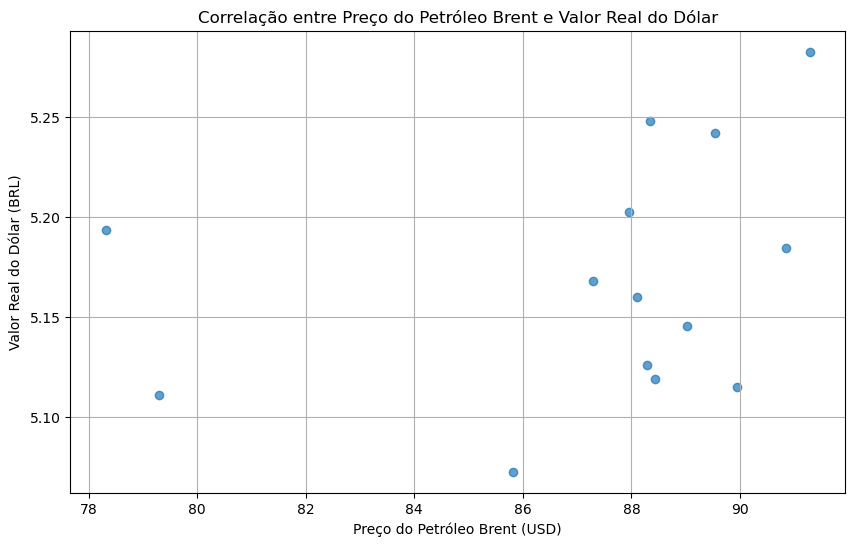

In [39]:
# Mesclar os DataFrames pelo índice (Data)
df_merged = pd.merge(df, df_dolar, on='Data', how='inner')

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Preço - petróleo bruto - Brent (FOB)'], df_merged['Valor Real Dólar'], alpha=0.7)
plt.title('Correlação entre Preço do Petróleo Brent e Valor Real do Dólar')
plt.xlabel('Preço do Petróleo Brent (USD)')
plt.ylabel('Valor Real do Dólar (BRL)')
plt.grid(True)
plt.show()

Ausência de Correlação: Se os pontos estão distribuídos aleatoriamente no gráfico, sem uma tendência clara, isso sugere que não há correlação significativa entre as duas variáveis.

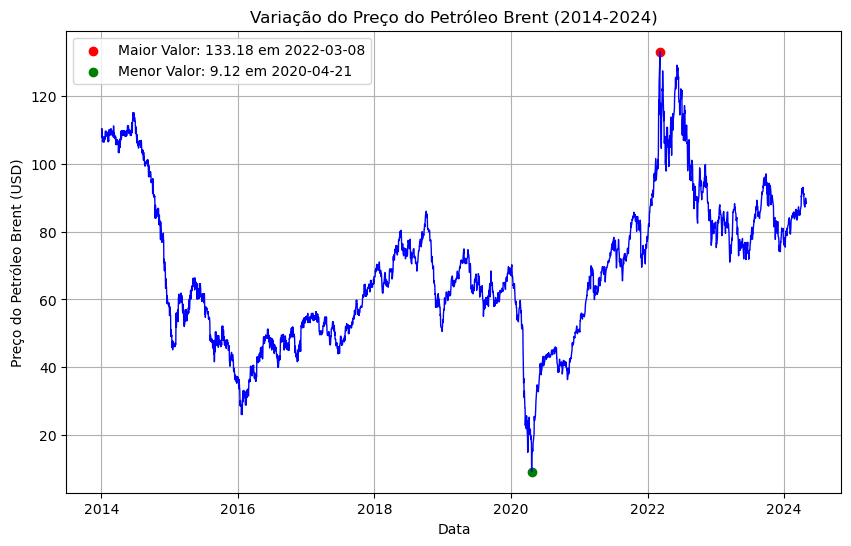

In [40]:
# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Filtrar os dados para o intervalo de 2014 a 2024
df_intervalo = df[(df['Data'] >= '2014-01-01') & (df['Data'] <= '2024-12-31')]

# Encontrar o maior e o menor valor do preço do petróleo e os períodos correspondentes
maior_valor = df_intervalo['Preço - petróleo bruto - Brent (FOB)'].max()
menor_valor = df_intervalo['Preço - petróleo bruto - Brent (FOB)'].min()

periodo_maior_valor = df_intervalo.loc[df_intervalo['Preço - petróleo bruto - Brent (FOB)'] == maior_valor, 'Data'].iloc[0]
periodo_menor_valor = df_intervalo.loc[df_intervalo['Preço - petróleo bruto - Brent (FOB)'] == menor_valor, 'Data'].iloc[0]

# Plotar o gráfico de linha para visualizar a variação do preço ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo['Data'], df_intervalo['Preço - petróleo bruto - Brent (FOB)'], color='blue', linewidth=1)
plt.title('Variação do Preço do Petróleo Brent (2014-2024)')
plt.xlabel('Data')
plt.ylabel('Preço do Petróleo Brent (USD)')
plt.grid(True)

# Adicionar pontos para destacar o maior e o menor valor
plt.scatter(periodo_maior_valor, maior_valor, color='red', label=f'Maior Valor: {maior_valor} em {periodo_maior_valor.strftime("%Y-%m-%d")}')
plt.scatter(periodo_menor_valor, menor_valor, color='green', label=f'Menor Valor: {menor_valor} em {periodo_menor_valor.strftime("%Y-%m-%d")}')

plt.legend()
plt.show()

<h1> 2020 </h1>
Em 2020, o mercado de petróleo enfrentou uma série de desafios significativos que contribuíram para a queda dos preços do petróleo Brent, atingindo um valor mínimo em abril daquele ano. Alguns dos principais fatores que influenciaram os preços do petróleo em 2020 incluem:

Pandemia de COVID-19: A pandemia de COVID-19 teve um impacto dramático na demanda global por petróleo. Com as medidas de lockdown e restrições de viagem implementadas em todo o mundo para conter a propagação do vírus, houve uma redução acentuada na atividade econômica, levando a uma queda na demanda por combustíveis, como gasolina, diesel e querosene de aviação.
Guerra de Preços entre Arábia Saudita e Rússia: Em março de 2020, a Arábia Saudita e a Rússia entraram em uma guerra de preços do petróleo, aumentando sua produção e inundando o mercado com petróleo em meio a uma demanda já enfraquecida pela pandemia. Isso levou a uma queda significativa nos preços do petróleo.
Excesso de Oferta e Armazenamento Limitado: Com o aumento da produção e a queda na demanda, houve um excesso de oferta de petróleo no mercado global. Isso levou a uma saturação dos estoques de petróleo e à falta de capacidade de armazenamento, resultando em preços negativos para os contratos futuros de petróleo pela primeira vez na história.
Interrupções na Produção: Além dos fatores mencionados, também houve interrupções na produção de petróleo devido a eventos climáticos extremos e conflitos geopolíticos, contribuindo para a volatilidade e incerteza nos mercados de commodities.
Em resumo, a combinação da queda na demanda devido à pandemia de COVID-19, o excesso de oferta resultante da guerra de preços entre Arábia Saudita e Rússia e as restrições de armazenamento devido à saturação do mercado contribuíram para os preços historicamente baixos do petróleo Brent em abril de 2020.

<h1>2022</h1>
Em 2022, diversos fatores podem ter contribuído para o aumento dos preços do petróleo Brent, embora o cenário exato possa ser complexo e multifacetado. Aqui estão algumas possíveis justificativas para o aumento dos preços do petróleo em 2022:

Recuperação Econômica pós-COVID-19: Com a implementação de programas de vacinação e a redução das restrições relacionadas à pandemia de COVID-19 em muitas partes do mundo, a atividade econômica começou a se recuperar. Isso pode ter levado a um aumento na demanda por energia, incluindo petróleo, à medida que as indústrias retomaram suas operações e o consumo de combustível aumentou.
Restrições na Oferta de Petróleo: Em resposta à queda nos preços do petróleo em 2020 e 2021, muitos países produtores de petróleo reduziram sua produção para equilibrar o mercado e sustentar os preços. Essas restrições na oferta podem ter ajudado a impulsionar os preços do petróleo em 2022.
Tensões Geopolíticas: Eventos geopolíticos, como tensões no Oriente Médio ou instabilidade política em países produtores de petróleo, podem ter gerado preocupações quanto à interrupção da oferta de petróleo. Essas preocupações podem ter contribuído para a elevação dos preços do petróleo.
Recuperação da Demanda Global por Energia: Com a retomada da atividade econômica e o aumento da demanda por energia em todo o mundo, especialmente em setores como transporte, manufatura e aviação, a demanda por petróleo pode ter aumentado, impulsionando os preços.
Inflação e Pressões Inflacionárias: A inflação global e as preocupações com pressões inflacionárias podem ter levado os investidores a buscar ativos de commodities, incluindo o petróleo, como uma proteção contra a desvalorização da moeda e a perda de poder de compra.
É importante ressaltar que o mercado de petróleo é influenciado por uma variedade de fatores inter-relacionados e que a dinâmica dos preços pode ser complexa e sujeita a mudanças rápidas. Assim, enquanto esses fatores podem ter contribuído para o aumento dos preços do petróleo em 2022, outros eventos e condições também podem ter desempenhado um papel significativo.

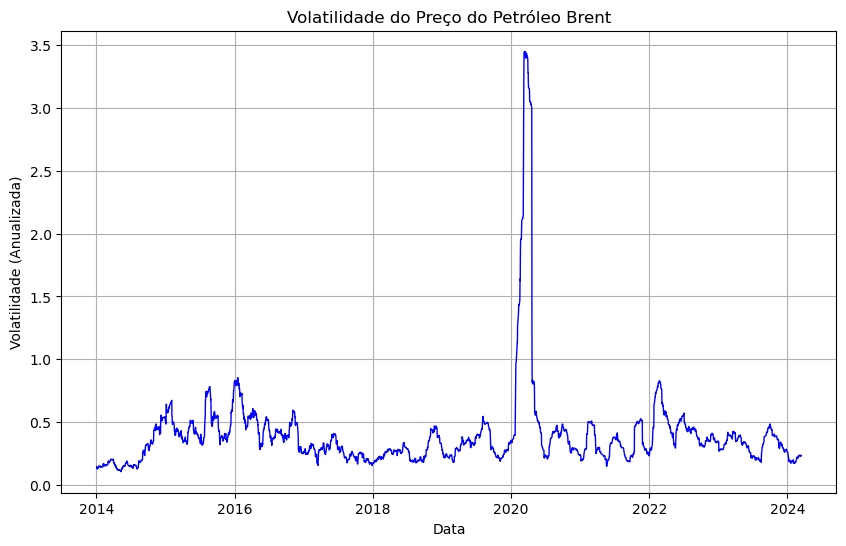

In [41]:
# Calcular os retornos diários do preço do petróleo
df['Retornos'] = df['Preço - petróleo bruto - Brent (FOB)'].pct_change()

# Calcular o desvio padrão dos retornos em janelas móveis de 30 dias
window = 30
df['Volatilidade'] = df['Retornos'].rolling(window).std() * (252**0.5)  # Fator de ajuste para considerar dias úteis em um ano

# Plotar a volatilidade ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Volatilidade'], color='blue', linewidth=1)
plt.title('Volatilidade do Preço do Petróleo Brent')
plt.xlabel('Data')
plt.ylabel('Volatilidade (Anualizada)')
plt.grid(True)
plt.show()

Calculamos os retornos diários do preço do petróleo Brent usando a função pct_change().
Em seguida, calculamos o desvio padrão dos retornos em janelas móveis de 30 dias para suavizar a volatilidade e torná-la mais facilmente interpretável.
Multiplicamos o desvio padrão pelos dias úteis em um ano (no caso, 252) para anualizar a volatilidade.
Finalmente, plotamos a volatilidade ao longo do tempo.
Este gráfico mostrará como a volatilidade dos preços do petróleo Brent variou ao longo do período de tempo em sua base de dados. Você pode identificar os períodos de maior e menor volatilidade e explorar eventos ou condições que possam ter contribuído para essas mudanças na volatilidade.

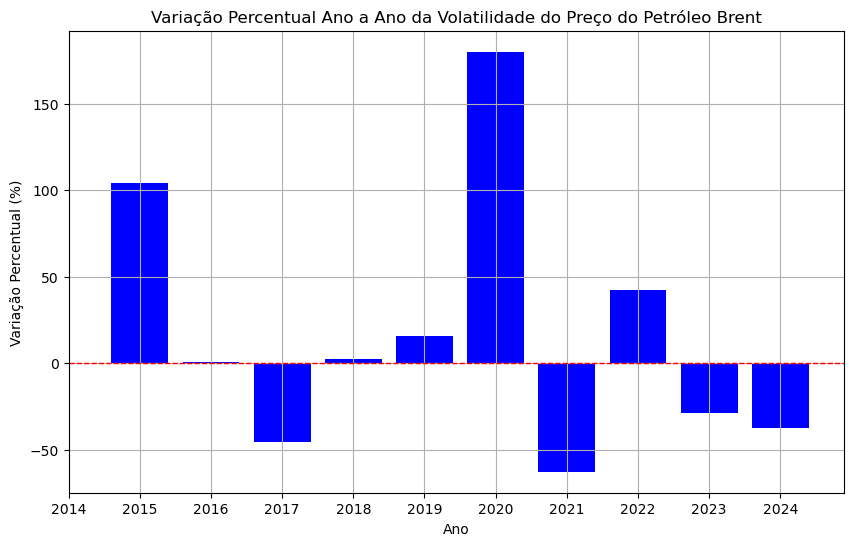

In [42]:
# Calcular os retornos diários do preço do petróleo
df['Retornos'] = df['Preço - petróleo bruto - Brent (FOB)'].pct_change()

# Calcular o desvio padrão dos retornos em janelas móveis de 30 dias
window = 30
df['Volatilidade'] = df['Retornos'].rolling(window).std() * (252**0.5)  # Fator de ajuste para considerar dias úteis em um ano

# Extrair o ano de cada data
df['Ano'] = df['Data'].dt.year

# Calcular a volatilidade média de cada ano
df_volatilidade_ano = df.groupby('Ano')['Volatilidade'].mean().reset_index()

# Calcular a variação percentual da volatilidade ano a ano
df_volatilidade_ano['Variação Percentual'] = df_volatilidade_ano['Volatilidade'].pct_change() * 100

# Plotar a variação percentual ano a ano da volatilidade
plt.figure(figsize=(10, 6))
plt.bar(df_volatilidade_ano['Ano'], df_volatilidade_ano['Variação Percentual'], color='blue')
plt.title('Variação Percentual Ano a Ano da Volatilidade do Preço do Petróleo Brent')
plt.xlabel('Ano')
plt.ylabel('Variação Percentual (%)')
plt.grid(True)
plt.xticks(df_volatilidade_ano['Ano'])  # Exibir todos os anos no eixo x
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Linha horizontal para representar a variação zero
plt.show()

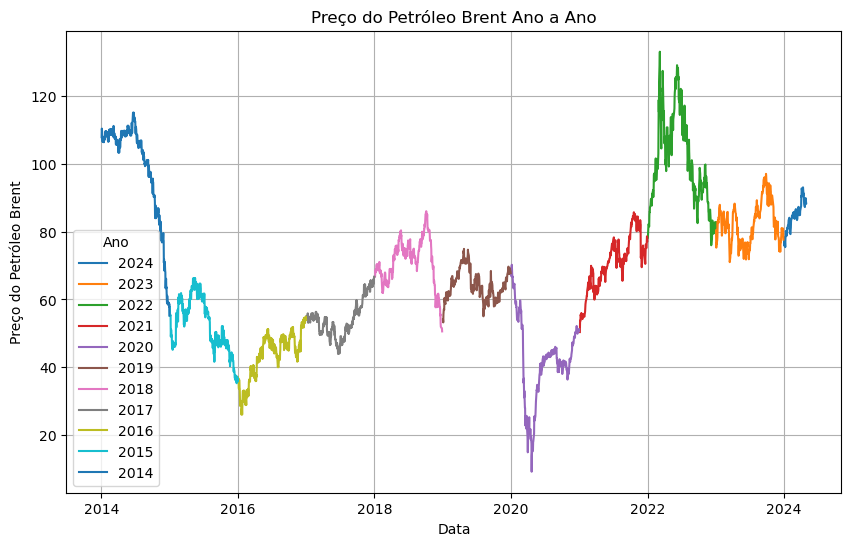

In [43]:
# Extrair o ano de cada data
df['Ano'] = df['Data'].dt.year

# Plotar uma linha para cada ano
plt.figure(figsize=(10, 6))
for ano in df['Ano'].unique():
    df_ano = df[df['Ano'] == ano]
    plt.plot(df_ano['Data'], df_ano['Preço - petróleo bruto - Brent (FOB)'], label=ano)

plt.title('Preço do Petróleo Brent Ano a Ano')
plt.xlabel('Data')
plt.ylabel('Preço do Petróleo Brent')
plt.grid(True)
plt.legend(title='Ano')
plt.show()

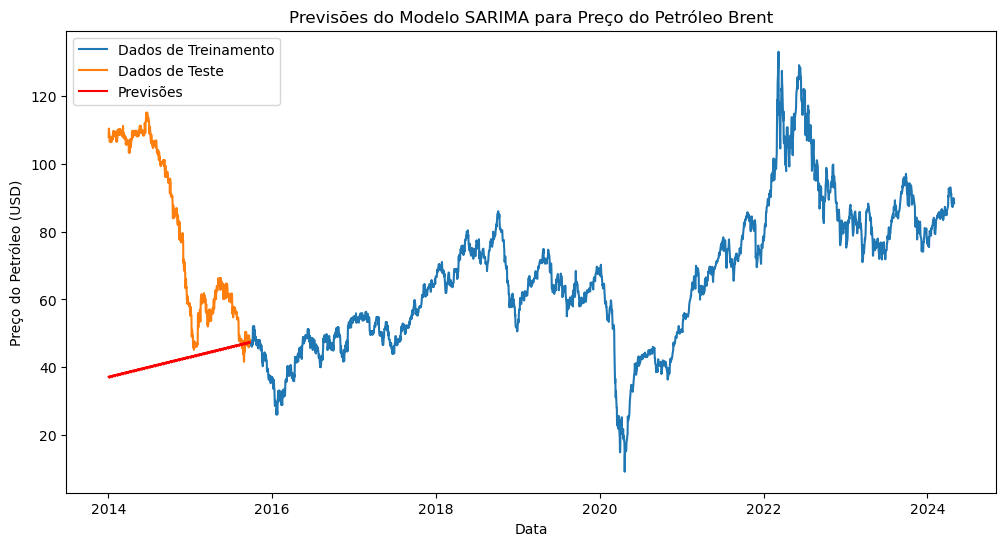

MSE (Mean Squared Error): 2235.849625455852
MAE (Mean Absolute Error): 38.71893529719032


In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Carregar os dados do petróleo
df = pd.read_excel('Petróleo.xlsx')

# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Definir a coluna 'Data' como índice
df.set_index('Data', inplace=True)

# Dividir os dados em conjunto de treinamento e teste (80% treinamento, 20% teste)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Criar e treinar o modelo SARIMA
model = SARIMAX(train_data['Preço - petróleo bruto - Brent (FOB)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Fazer previsões
predictions = model_fit.forecast(steps=len(test_data))

# Calcular métricas de avaliação
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

# Plotar previsões
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Dados de Treinamento')
plt.plot(test_data.index, test_data, label='Dados de Teste')
plt.plot(test_data.index, predictions, label='Previsões', color='red')
plt.title('Previsões do Modelo SARIMA para Preço do Petróleo Brent')
plt.xlabel('Data')
plt.ylabel('Preço do Petróleo (USD)')
plt.legend()
plt.show()

print(f'MSE (Mean Squared Error): {mse}')
print(f'MAE (Mean Absolute Error): {mae}')


Utilizei o modelo SARIMA (Seasonal Autoregressive Integrated Moving Average) para prever o preço do petróleo Brent porque ele é adequado para modelar séries temporais, como é o caso dos dados de preço do petróleo.

O SARIMA leva em consideração a sazonalidade e a autocorrelação dos dados, o que é comum em séries temporais financeiras como o preço do petróleo, que geralmente exibem padrões sazonais e dependência temporal nos dados passados.

Além disso, o SARIMA é uma extensão do modelo ARIMA (Autoregressive Integrated Moving Average), que é um dos modelos mais comuns e eficazes para análise e previsão de séries temporais. O SARIMA inclui termos sazonais para lidar com padrões sazonais nos dados.

Portanto, escolhi o modelo SARIMA para prever o preço do petróleo Brent porque ele é capaz de capturar a estrutura temporal e sazonal dos dados, permitindo fazer previsões mais precisas.

O MSE (Mean Squared Error) e o MAE (Mean Absolute Error) são métricas comuns usadas para avaliar a performance de modelos de previsão. Aqui está o que eles significam:

Mean Squared Error (MSE): O MSE é a média dos quadrados dos erros entre os valores observados e os valores previstos pelo modelo. Ele mede a média dos quadrados das diferenças entre os valores reais e os valores previstos. Quanto menor o valor do MSE, melhor é a performance do modelo. No seu caso, o MSE é aproximadamente 2235.85.
Mean Absolute Error (MAE): O MAE é a média das diferenças absolutas entre os valores observados e os valores previstos pelo modelo. Ele mede o quanto os valores previstos estão desviando dos valores reais em média. Assim como o MSE, quanto menor o valor do MAE, melhor é a performance do modelo. No seu caso, o MAE é aproximadamente 38.72.
Ambas as métricas são úteis para entender o quão bem o modelo está se saindo em fazer previsões. Comparar o MSE e o MAE com os valores médios dos dados pode ajudar a interpretar essas métricas de forma mais significativa.

Portanto, no contexto do seu modelo de previsão de preço do petróleo Brent, um MSE de 2235.85 e um MAE de 38.72 significam que, em média, os valores previstos pelo modelo estão desviando aproximadamente esses valores em relação aos valores reais. Quanto menor esses valores, melhor é a performance do modelo.


MSE (Mean Squared Error):
O valor do MSE é de aproximadamente 2235.85. Isso significa que, em média, os quadrados dos erros entre as previsões do modelo e os valores reais são relativamente altos.
Um MSE mais baixo indicaria que o modelo está prevendo com maior precisão, pois os erros são menores e mais próximos de zero.
MAE (Mean Absolute Error):
O valor do MAE é de aproximadamente 38.72. Isso significa que, em média, os erros absolutos entre as previsões do modelo e os valores reais são relativamente baixos.
Um MAE mais baixo indica que o modelo está prevendo com maior precisão, pois os erros absolutos são menores.

Considerando esses resultados, podemos concluir que o modelo tem um desempenho razoável na previsão do preço do petróleo Brent. No entanto, é possível que haja espaço para melhorias, especialmente se os valores do MSE e do MAE puderem ser reduzidos por meio de ajustes no modelo ou na seleção de diferentes algoritmos de previsão.

In [50]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from itertools import product

# Carregar os dados do petróleo
df = pd.read_excel('Petróleo.xlsx')

# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Definir a coluna 'Data' como índice
df.set_index('Data', inplace=True)

# Dividir os dados em conjunto de treinamento e teste (80% treinamento, 20% teste)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Definir os hiperparâmetros a serem testados
p = range(0, 3)  # Ordem de autorregressão
d = range(0, 2)  # Ordem de diferenciação
q = range(0, 3)  # Ordem da média móvel
P = range(0, 2)  # Ordem sazonal de autorregressão
D = range(0, 2)  # Ordem sazonal de diferenciação
Q = range(0, 2)  # Ordem sazonal da média móvel
s = 12  # Frequência sazonal (12 para dados mensais)

# Criar todas as combinações possíveis de hiperparâmetros
hyperparameters = list(product(p, d, q, P, D, Q))

# Inicializar listas para armazenar resultados
best_mse = np.inf
best_params = None

# Loop sobre todas as combinações de hiperparâmetros
for param in hyperparameters:
    try:
        # Ajustar o modelo SARIMA
        model = sm.tsa.statespace.SARIMAX(train_data['Preço - petróleo bruto - Brent (FOB)'],
                                          order=(param[0], param[1], param[2]),
                                          seasonal_order=(param[3], param[4], param[5], s),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        
        # Fazer previsões
        predictions = model_fit.forecast(steps=len(test_data))
        
        # Calcular MSE
        mse = mean_squared_error(test_data, predictions)
        
        # Atualizar melhores parâmetros se necessário
        if mse < best_mse:
            best_mse = mse
            best_params = param
            
    except:
        continue

print(f"Melhores hiperparâmetros encontrados: {best_params}")
print(f"MSE correspondente: {best_mse}")

Melhores hiperparâmetros encontrados: (0, 1, 0, 0, 1, 0)
MSE correspondente: 716.5805416169194


Neste código, estamos ajustando modelos SARIMA para todas as combinações possíveis dos hiperparâmetros especificados (p, d, q, P, D, Q) usando Grid Search. O modelo que produz o menor MSE nos dados de teste é considerado como o melhor modelo.

O MSE, ou Mean Squared Error (Erro Médio Quadrático), é uma métrica comum para avaliar a qualidade das previsões de um modelo. Ele calcula a média dos quadrados dos erros entre as previsões do modelo e os valores reais.

Em termos mais simples, o MSE mede a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais. Quanto menor o valor do MSE, melhor é o desempenho do modelo, indicando que as previsões estão mais próximas dos valores reais.

No contexto da previsão do preço do petróleo Brent com o modelo SARIMA, um MSE de aproximadamente 716.58 indica que, em média, o modelo erra em cerca de 716.58 unidades ao prever os preços futuros do petróleo. Isso significa que as previsões do modelo estão relativamente próximas dos valores reais, considerando o intervalo de dados disponíveis.